# Global Climate Change Data from 1750－2015 and Forecasting




import pandas as pd
import numpy as np

df = pd.read_csv('https://query.data.world/s/4i2iz2m6ox3h5okdkcwdzawk6pl4av')
temp = pd.DataFrame(df)
M = temp['AverageTemperature'].dropna().mean()
temp['AverageTemperature'] = temp['AverageTemperature'].replace(np.NaN,M)
print(temp)


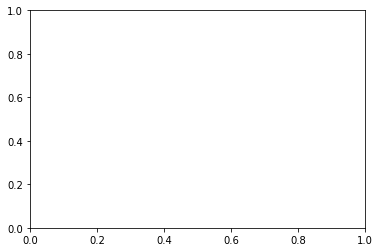

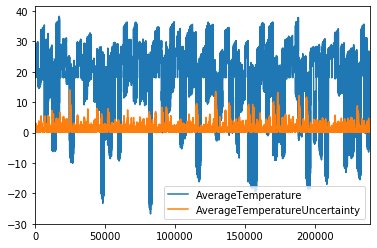

In [4]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
temp.plot()
plt.show()

In [16]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(temp['AverageTemperature'])
print(result)
print(result[1])

(-7.248977615819301, 1.8008458432408117e-10, 84, 239092, {'1%': -3.4303773508532642, '5%': -2.8615520887261363, '10%': -2.5667764343924038}, 865564.4369984512)
1.8008458432408117e-10


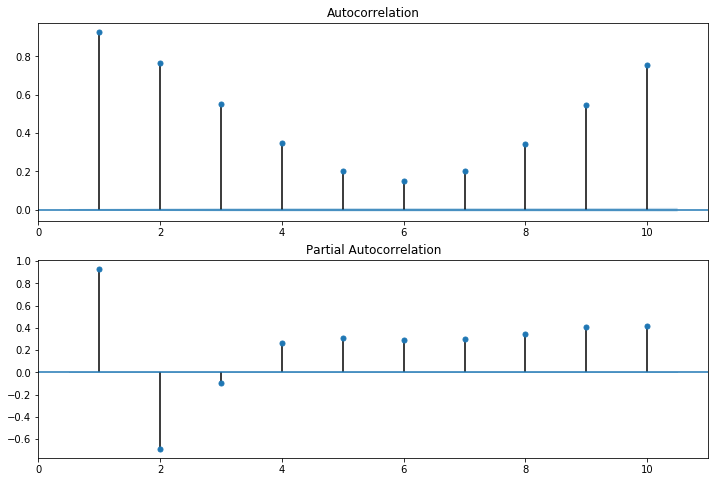

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(temp['AverageTemperature'], lags=10,zero=False,ax=ax1)
plot_pacf(temp['AverageTemperature'], lags=10,zero=False,ax=ax2)
plt.show()

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(3,7):
    for q in range(3,7):
        try:
                model = SARIMAX(temp['AverageTemperature'], order=(p,0,q))
                results = model.fit()
                order_aic_bic.append((p,q,results.aic,results.bic))
        except:
                order_aic_bic.append((p,q,None,None))

order_df = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])
print(order_df)


C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum

    p  q           AIC           BIC
0   3  3  9.558305e+05  9.559032e+05
1   3  4  1.151908e+06  1.151991e+06
2   3  5  9.195424e+05  9.196359e+05
3   3  6  9.193724e+05  9.194763e+05
4   4  3  9.625796e+05  9.626627e+05
5   4  4  9.537741e+05  9.538676e+05
6   4  5  9.251412e+05  9.252450e+05
7   4  6  9.194195e+05  9.195338e+05
8   5  3  9.571151e+05  9.572086e+05
9   5  4  9.627935e+05  9.628973e+05
10  5  5  9.243952e+05  9.245094e+05
11  5  6  9.192882e+05  9.194128e+05
12  6  3  1.021495e+06  1.021599e+06
13  6  4  9.571290e+05  9.572433e+05
14  6  5  9.258386e+05  9.259632e+05
15  6  6  8.875376e+05  8.876726e+05


C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:     AverageTemperature   No. Observations:               239177
Model:               SARIMAX(6, 0, 6)   Log Likelihood             -460060.029
Date:                Sat, 30 May 2020   AIC                         920148.058
Time:                        21:26:45   BIC                         920293.448
Sample:                             0   HQIC                        920190.520
                             - 239177                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0505      0.001     40.852      0.000       0.048       0.053
ar.L1          1.9946      0.011    179.696      0.000       1.973       2.016
ar.L2         -0.9958      0.031    -32.264      0.0

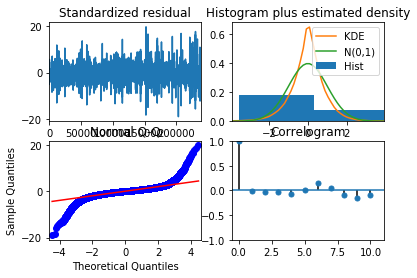

In [6]:
model_1 = SARIMAX(temp['AverageTemperature'],order=(6,0,6),trend='c')
results_1 = model_1.fit()
print(results_1.summary())
print(results_1.resid)
results_1.plot_diagnostics()
plt.show()

In [7]:
res = results_1
forecast = res.get_forecast(steps=20)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
print(confidence_intervals)
print("-------------------------------------------------")
print(mean_forecast)

        lower AverageTemperature  upper AverageTemperature
239177                  8.363342                 14.946947
239178                  1.408218                  9.376012
239179                 -2.962642                  5.449531
239180                 -4.209305                  4.278012
239181                 -2.140432                  6.391076
239182                  2.854512                 11.447903
239183                  9.394937                 18.006843
239184                 15.706566                 24.328106
239185                 20.071724                 28.709721
239186                 21.351176                 30.047431
239187                 19.177049                 27.988696
239188                 14.126556                 23.132510
239189                  7.537369                 16.787336
239190                  1.180833                 10.687244
239191                 -3.245393                  6.467556
239192                 -4.561608                  5.2870

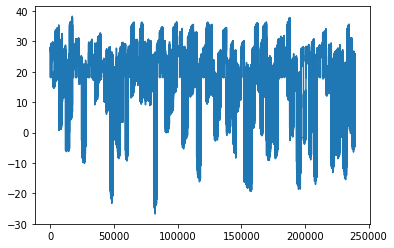

In [8]:
ll = confidence_intervals.loc[:,'lower AverageTemperature']
ul = confidence_intervals.loc[:,'upper AverageTemperature']
plt.plot(temp.index,temp['AverageTemperature'], label='observed')


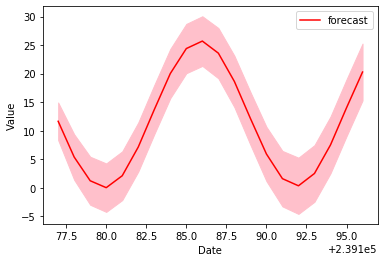

In [9]:
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
plt.fill_between(mean_forecast.index,ll,ul,color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
